In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import matplotlib.pyplot as plt
from SNN_JHK_v1_230308 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
print('Start SNN_230307')

# Layer Initialization
L1_num_neurons = 42
L1 = IzhikevichLayer(0.02, 0.2, -65, 8, L1_num_neurons)

L2_num_neurons = 20
L2 = IzhikevichLayer(0.02, 0.2, -65, 8, L2_num_neurons)

# Wegiht initialization
weights = np.random.uniform(
    low=0.9, high=1, size=(L2_num_neurons, L1_num_neurons))
S1 = Synapse(weights)

# Input signal
signal_length = 1000
input_signal = np.random.uniform(low=5, high=10,
                                    size=(signal_length, L1_num_neurons))

L1_spike_times = np.zeros((L1_num_neurons, signal_length))
L2_spike_times = np.zeros((L2_num_neurons, signal_length))

# simulation
start_time = time.time()

for i in range(len(input_signal)):
    I = input_signal[i]
    L1.update(I)
    
    post_input = S1.cal_post_input(L1.spikes)
    
    L2.update(post_input)

    L1_spike_times[:, i] = L1.spikes
    L2_spike_times[:, i] = L2.spikes

end_time = time.time()
vectorized_time = end_time - start_time
# simulation end

# Print the execution times
print("Vectorized execution time:", vectorized_time)
#print(np.sum(L1_spike_times, axis=1))
#print(np.sum(L2_spike_times, axis=1))

#plt.eventplot(L1_spike_times, linelengths=0.3)
#plot_spike_times(L1_spike_times)
#plot_spike_times(L2_spike_times)


Start SNN_230307
layer initialized
layer initialized
Vectorized execution time: 0.05599498748779297


<Figure size 640x480 with 0 Axes>

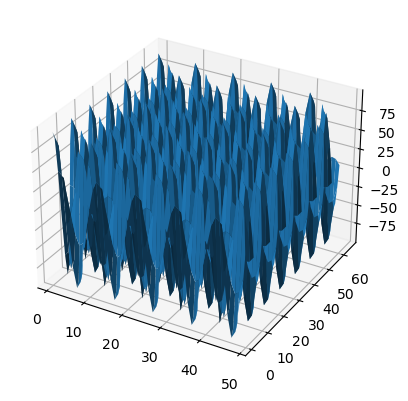

layer initialized
Simulation execution time: 0.07999920845031738


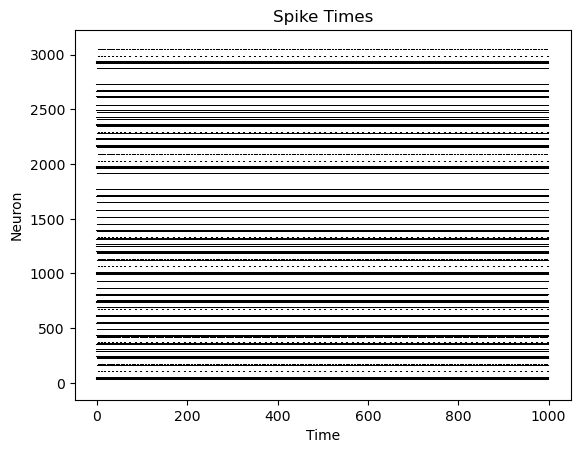

In [9]:
ncols, nrows = 64, 48
sine_wave_input = plot_2d_sine_wave(ncols=ncols, nrows=nrows, freq=0.1, amp=100)

# Finger Layer Initialization
F1_num_neurons = ncols*nrows
F1 = IzhikevichLayer(0.02, 0.2, -65, 8, F1_num_neurons)

signal_length = 1000

sine_wave_input = sine_wave_input.reshape(ncols*nrows)

F1_spike_times = np.zeros((F1_num_neurons, signal_length))

# simulation
start_time = time.time()
for i in range(signal_length):
    F1.update(sine_wave_input)
    F1_spike_times[:, i] = F1.spikes
end_time = time.time()
simulation_time = end_time - start_time
print("Simulation execution time:", simulation_time)

plot_spike_times(F1_spike_times)
